In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

# Выборка

In [2]:
raw = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/sample.csv')
df = pd.read_csv('c:/Users/gandh/dev/unv/smoed/NB/data/main_data.csv')
df.to_csv('data/data1.csv', index=False)
n = len(df)
n

100

# Переменная $nu$

## Одна переменная

In [3]:
df2 = df.drop('E', axis=1)
df2.to_csv('data/data2.csv', index=False)
df2.head()

,nu
0,481
1,445
2,550
3,465
4,566


## Ранжированный ряд

In [4]:
df2 = df2.sort_values(by=['nu'], ignore_index = True)
df2.to_csv('data/data3.csv', index=False)
df2.head()

,nu
0,321
1,351
2,352
3,362
4,378


In [5]:
df2.min()
df2.max()

nu    321
dtype: int64

nu    623
dtype: int64

In [6]:
X = df2['nu']

## Вариационный ряд

In [7]:
X.mode()

0    465
dtype: int64

In [8]:
table_af = X.value_counts().sort_index()
table_rf = X.value_counts(normalize=True).sort_index()
table_af = pd.DataFrame({'nu': table_af.index, 'af': table_af.values})
table_rf = pd.DataFrame({'nu': table_rf.index, 'rf': table_rf.values})
table_rf2 = table_rf.copy()
table_rf2['rf'] = np.round(table_rf2['rf'], 4)
table_af.to_csv('data/data4.csv', index=False)
table_rf2.to_csv('data/data5.csv', index=False)

## Интервальный ряд

In [9]:
k = 1+3.31*np.log10(n)
k = int(np.floor(k))
k

7

In [10]:
min(X)
max(X)

321

623

In [11]:
h = (max(X)-min(X))/k
h = int(np.ceil(h))
h

44

In [12]:
data_interval = pd.concat([table_af, table_rf], ignore_index=True, axis=1).drop(2, axis=1)
data_interval.columns = ['nu', 'af', 'rf']
data_interval.to_csv('data/data6.csv', index=False)

In [13]:
ivs = np.hstack((np.arange(min(X), max(X), h), np.array(max(X))))
ivs

array([321, 365, 409, 453, 497, 541, 585, 623])

In [14]:
data_interval['inter'] = pd.cut(data_interval['nu'], bins=ivs, 
                                right=False)
data_interval.iloc[76, 3] = data_interval.iloc[75, 3]
data_interval['inter'].value_counts().sort_index()

[321, 365)     4
[365, 409)     8
[409, 453)    22
[453, 497)    22
[497, 541)    14
[541, 585)     5
[585, 623)     2
Name: inter, dtype: int64

In [15]:
f_inter = data_interval.groupby(['inter'])[['af', 'rf']].apply(sum).reset_index()
f_inter['avg_inter'] = np.array([np.mean([ivs[i], ivs[i+1]], axis=0) for i in range(k)])
f_inter = f_inter[['inter', 'avg_inter', 'af', 'rf']]
f_inter['avg_inter'] = (f_inter['avg_inter']).astype(int)
f_inter['af'] = (f_inter['af']).astype(int)
f_inter['rf'] = np.round(f_inter['rf'], 2)
f_inter.to_csv('data/data7.csv', index=False)
f_inter

,inter,avg_inter,af,rf
0,"[321, 365)",343,4,0.04
1,"[365, 409)",387,9,0.09
2,"[409, 453)",431,27,0.27
3,"[453, 497)",475,35,0.35
4,"[497, 541)",519,17,0.17
5,"[541, 585)",563,6,0.06
6,"[585, 623)",604,2,0.02


## Графики абсолют

### Полигон

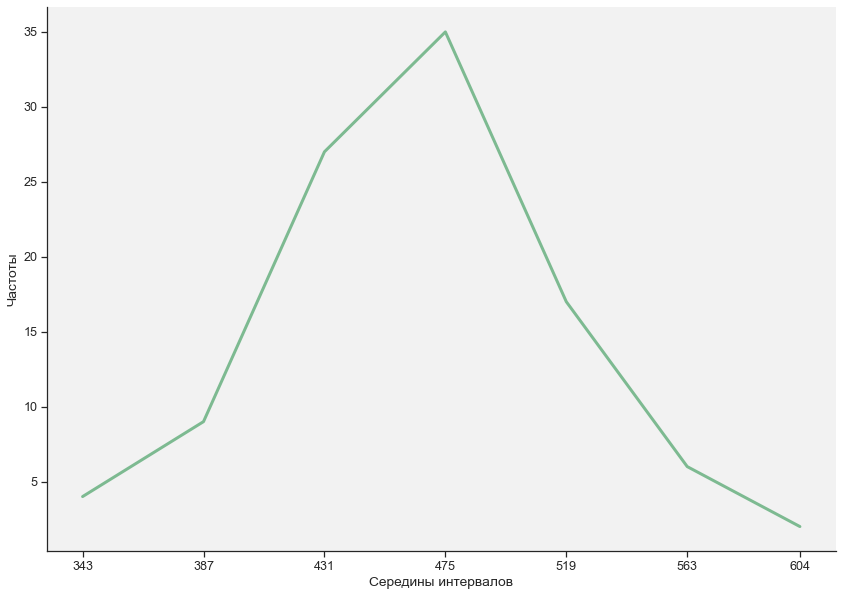

In [16]:
sns.set_theme(palette='crest', font_scale=1.15)
sns.set_style("ticks", {"axes.facecolor": ".95"})
ax = sns.relplot(data=f_inter, x='avg_inter', y='af', kind='line', 
                 height=8.27, aspect=11.7/8.27, linewidth=3)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'])
plt.savefig('pics/3.png')

### Гист

#### Только ось ординат

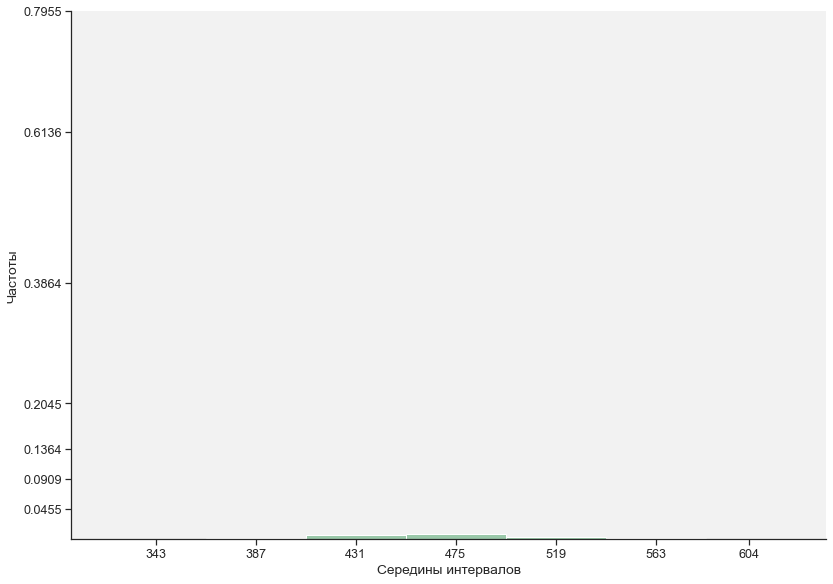

In [17]:
ax = sns.displot(data=df, x='nu', bins=ivs, kind='hist', stat='density',
                 height=8.27, aspect=11.7/8.27,)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af']/h)
plt.savefig('pics/4o.png')

#### График

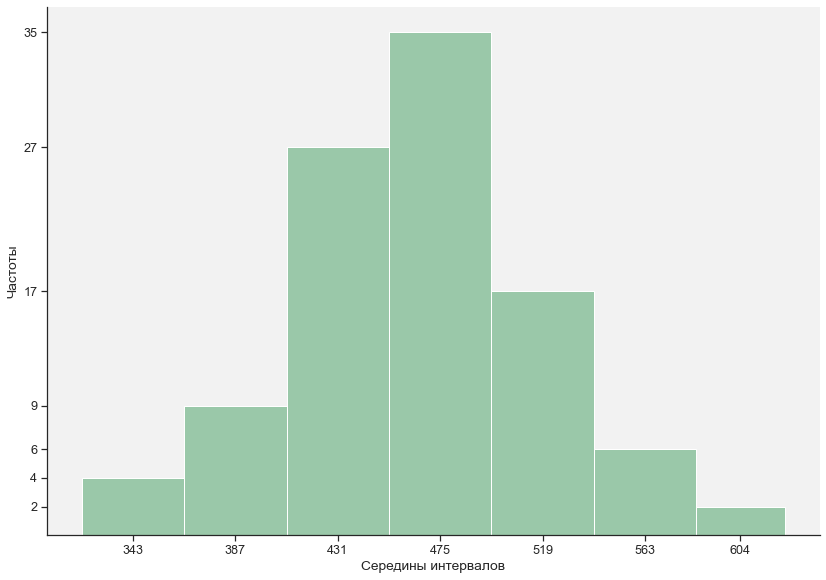

In [18]:
ax = sns.displot(data=df, x='nu', bins=ivs, kind='hist', 
                 height=8.27, aspect=11.7/8.27,)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af'])
plt.savefig('pics/4.png')

## Графики относительно

### ecdf

In [19]:
f_inter['sum_rf'] = f_inter['rf'].cumsum()
f_inter

,inter,avg_inter,af,rf,sum_rf
0,"[321, 365)",343,4,0.04,0.04
1,"[365, 409)",387,9,0.09,0.13
2,"[409, 453)",431,27,0.27,0.40
3,"[453, 497)",475,35,0.35,0.75
4,"[497, 541)",519,17,0.17,0.92
5,"[541, 585)",563,6,0.06,0.98
6,"[585, 623)",604,2,0.02,1.00


Text(387, 0.04, '')

Text(431, 0.13, '')

Text(475, 0.4, '')

Text(519, 0.75, '')

Text(563, 0.92, '')

Text(604, 0.98, '')

Text(648, 1, '')

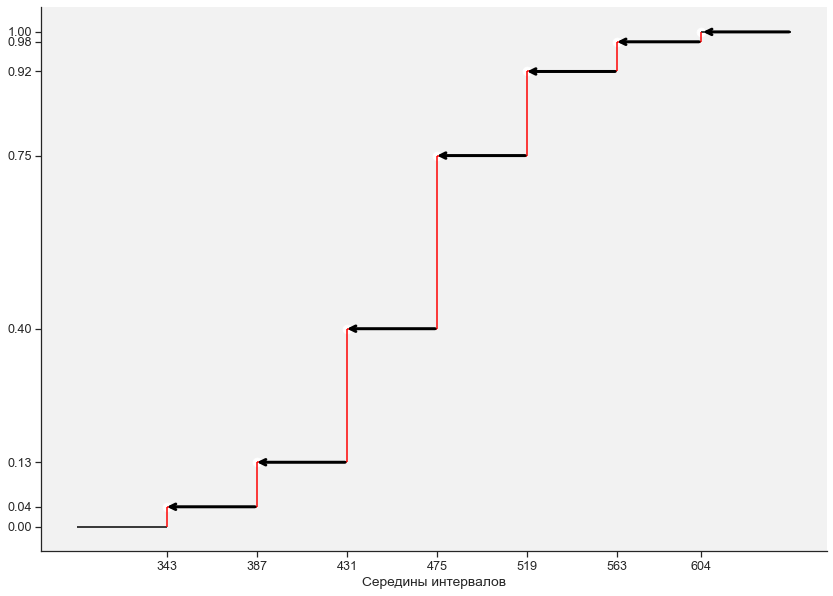

In [20]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='sum_rf', s=80,
                 kind='scatter', height=8.27, aspect=11.7/8.27, color='w')
for i in range(6):
    plt.hlines(f_inter['sum_rf'][i], f_inter['avg_inter'][i], f_inter['avg_inter'][i+1], color='r')
plt.hlines(1, 604, 604+h, color='k')
plt.hlines(0, 343-h, 343, color='k')
for i in range(6):
    plt.vlines(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i], f_inter['sum_rf'][i+1], color='r', linestyle='-')
plt.vlines(343, 0, 0.04, color='r', linestyle='-')
for i in range(6):
    plt.annotate('', xy=(f_inter['avg_inter'][i]-1, f_inter['sum_rf'][i]), 
                 xytext=(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i]), 
                 arrowprops=dict(arrowstyle="->", color='k', linewidth=3))
plt.annotate('', xy=(604, 1), 
                 xytext=(604+h, 1), 
                 arrowprops=dict(arrowstyle="->", color='k', linewidth=3))
ax.set_axis_labels('Середины интервалов', '')
ax.set(xticks=f_inter['avg_inter'], yticks=[0]+f_inter['sum_rf'].to_list())
plt.savefig('pics/5.png')

### Полигон

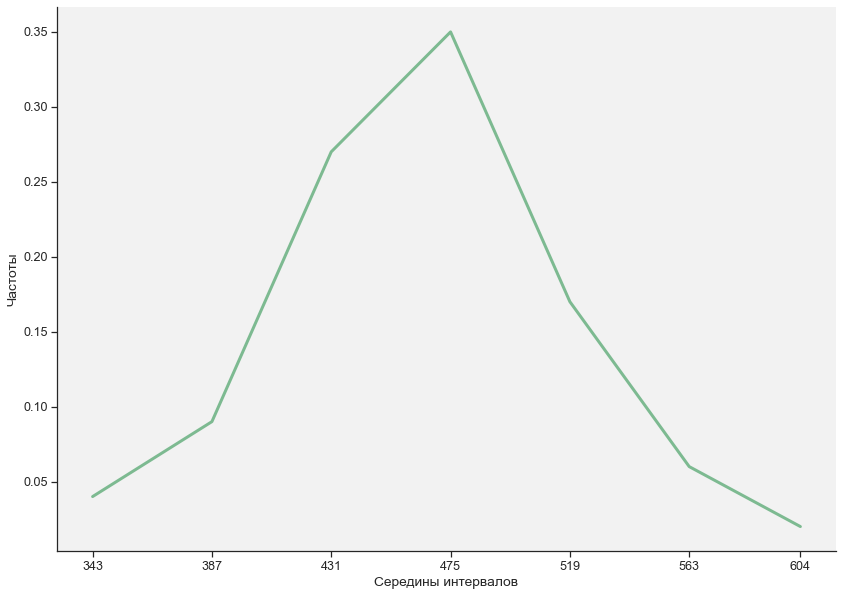

In [21]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='rf', kind='line', 
                 height=8.27, aspect=11.7/8.27, linewidth=3)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'])
plt.savefig('pics/6.png')

### Гист

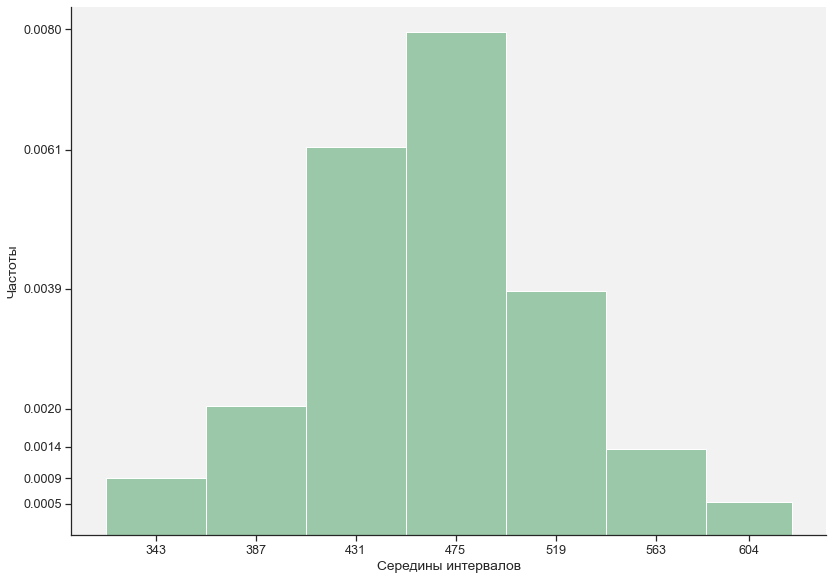

In [22]:
ax = sns.displot(data=df, x='nu', bins=ivs, kind='hist',
                 height=8.27, aspect=11.7/8.27, stat='density')
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'], yticks=round((f_inter['rf']/h), 4))
plt.savefig('pics/7.png')

# Переменная $E$

## Одна переменная

In [23]:
df2 = df.drop('nu', axis=1)
df2.to_csv('data2/data2.csv', index=False)
df2.head()

,E
0,135.2
1,124.7
2,147.9
3,140.9
4,168.5


## Ранжированный ряд

In [24]:
df2 = df2.sort_values(by=['E'], ignore_index = True)
df2.to_csv('data2/data3.csv', index=False)
df2.head()

,E
0,84.9
1,86.1
2,89.0
3,91.4
4,94.6


In [25]:
df2.min()
df2.max()

E    84.9
dtype: float64

E    195.7
dtype: float64

In [26]:
X = df2['E']

## Вариационный ряд

In [27]:
X.mode()

0    117.7
1    122.3
2    130.3
3    132.5
4    140.7
5    141.2
dtype: float64

In [28]:
table_af0 = X.value_counts().sort_index()
table_rf0 = X.value_counts(normalize=True).sort_index()
table_af = pd.DataFrame({'E': table_af0.index, 'af': table_af0.values})
table_rf = pd.DataFrame({'E': table_rf0.index, 'rf': table_rf0.values})
table_rf2 = table_rf.copy()
table_rf2['rf'] = np.round(table_rf2['rf'], 4)
table_af.to_csv('data2/data4.csv', index=False)
table_rf2.to_csv('data2/data5.csv', index=False)

## Интервальный ряд

In [29]:
k = 1+3.31*np.log10(n)
k = int(np.floor(k))
k

7

In [30]:
min(X)
max(X)

84.9

195.7

In [31]:
h = (max(X)-min(X))/k
h
h = int(np.ceil(h))
h 
h

15.828571428571426

16

16

In [32]:
data_interval = pd.concat([table_af, table_rf], ignore_index=True, axis=1).drop(2, axis=1)
data_interval.columns = ['E', 'af', 'rf']
data_interval.to_csv('data2/data6.csv', index=False)

In [33]:
ivs = np.hstack((np.arange(min(X), max(X), h), np.array(max(X))))
ivs

array([ 84.9, 100.9, 116.9, 132.9, 148.9, 164.9, 180.9, 195.7])

In [34]:
data_interval['inter'] = pd.cut(data_interval['E'], bins=ivs, 
                                right=False)
data_interval.iloc[93, 3] = data_interval.iloc[92, 3]
data_interval['inter'].value_counts().sort_index()

[84.9, 100.9)      6
[100.9, 116.9)    14
[116.9, 132.9)    28
[132.9, 148.9)    31
[148.9, 164.9)     9
[164.9, 180.9)     4
[180.9, 195.7)     2
Name: inter, dtype: int64

In [35]:
f_inter = data_interval.groupby(['inter'])[['af', 'rf']].apply(sum).reset_index()
f_inter['avg_inter'] = np.array([np.mean([ivs[i], ivs[i+1]], axis=0) for i in range(k)])
f_inter = f_inter[['inter', 'avg_inter', 'af', 'rf']]
f_inter['af'] = (f_inter['af']).astype(int)
f_inter['rf'] = np.round(f_inter['rf'], 2)
f_inter.to_csv('data2/data7.csv', index=False)
f_inter
f_inter['af'].sum()
f_inter['rf'].sum()

,inter,avg_inter,af,rf
0,"[84.9, 100.9)",92.9,6,0.06
1,"[100.9, 116.9)",108.9,14,0.14
2,"[116.9, 132.9)",124.9,32,0.32
3,"[132.9, 148.9)",140.9,33,0.33
4,"[148.9, 164.9)",156.9,9,0.09
5,"[164.9, 180.9)",172.9,4,0.04
6,"[180.9, 195.7)",188.3,2,0.02


100

1.0

## Графики абсолют

### Полигон

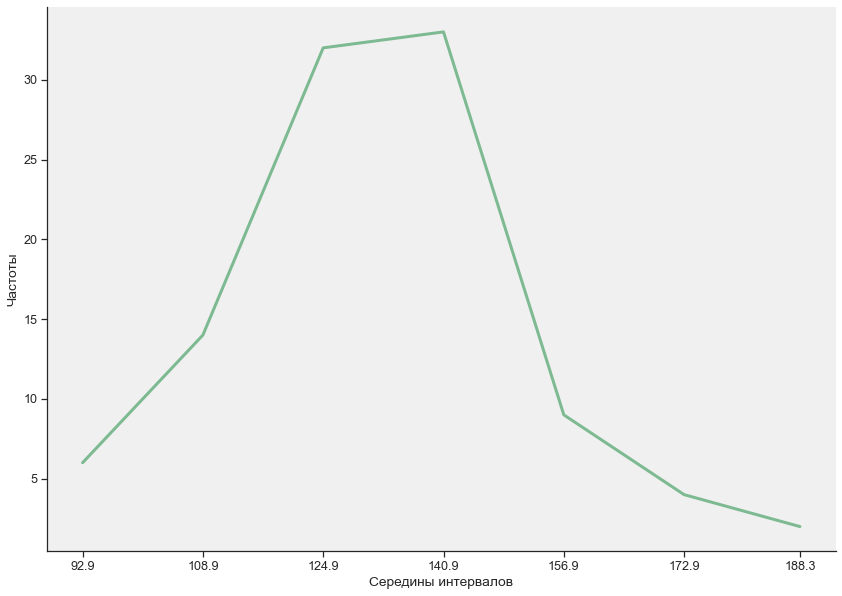

In [36]:
sns.set_theme(palette='crest', font_scale=1.15)
sns.set_style('ticks', {"axes.facecolor": ".94"})
ax = sns.relplot(data=f_inter, x='avg_inter', y='af', kind='line', 
                 height=8.27, aspect=11.7/8.27, linewidth=3)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'])
plt.savefig('pics2/3.png')

### Гист

#### Только ось ординат

In [37]:
h*(2.062+2+0.875+0.562+0.375+0.25+0.125)

99.984

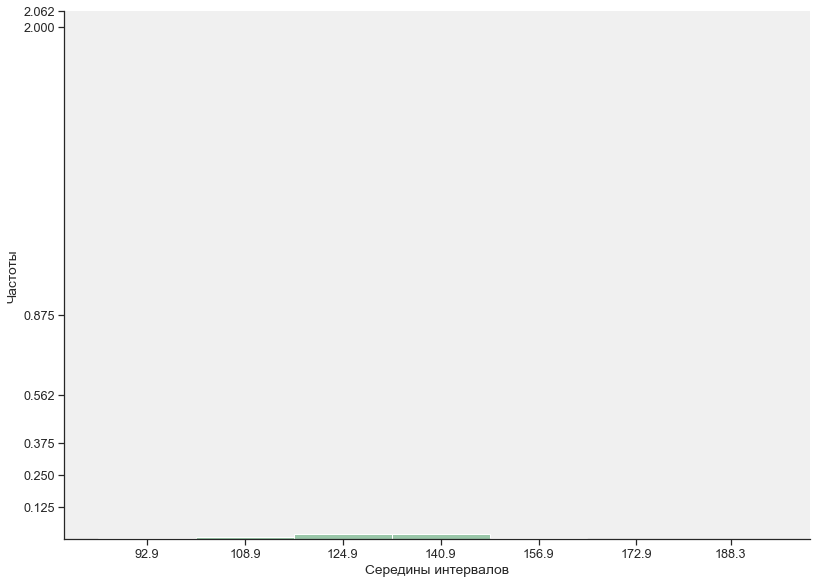

In [38]:
ax = sns.displot(data=df, x='E', bins=ivs, kind='hist', stat='density',
                 height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af']/h)
plt.savefig('pics2/4o.png')

#### График

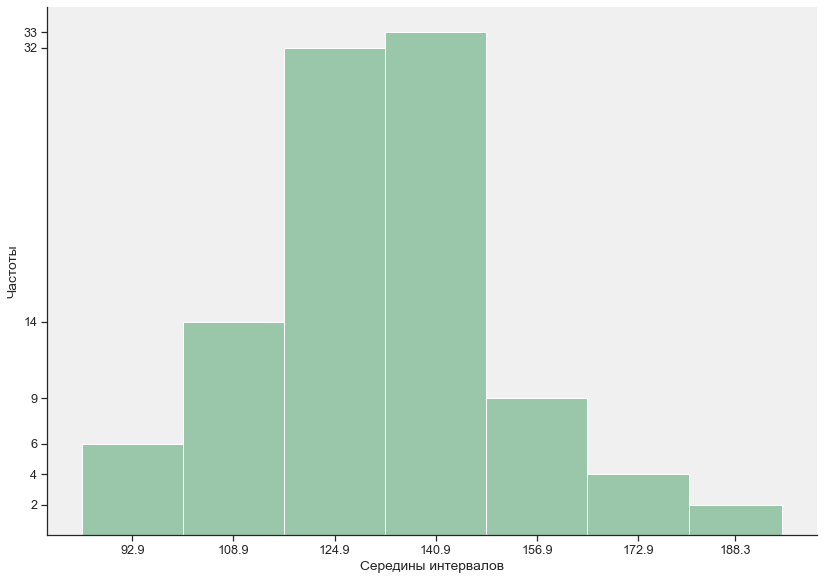

In [39]:
ax = sns.displot(data=df, x='E', bins=ivs, kind='hist', 
                 height=8.27, aspect=11.7/8.27)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'], yticks=f_inter['af'])
plt.savefig('pics2/4.png')

## Графики относительно

### ecdf

In [40]:
f_inter['sum_rf'] = f_inter['rf'].cumsum()
f_inter

,inter,avg_inter,af,rf,sum_rf
0,"[84.9, 100.9)",92.9,6,0.06,0.06
1,"[100.9, 116.9)",108.9,14,0.14,0.20
2,"[116.9, 132.9)",124.9,32,0.32,0.52
3,"[132.9, 148.9)",140.9,33,0.33,0.85
4,"[148.9, 164.9)",156.9,9,0.09,0.94
5,"[164.9, 180.9)",172.9,4,0.04,0.98
6,"[180.9, 195.7)",188.3,2,0.02,1.00


Text(108.9, 0.06, '')

Text(124.9, 0.2, '')

Text(140.9, 0.52, '')

Text(156.9, 0.8500000000000001, '')

Text(172.9, 0.9400000000000001, '')

Text(188.3, 0.9800000000000001, '')

Text(208, 1, '')

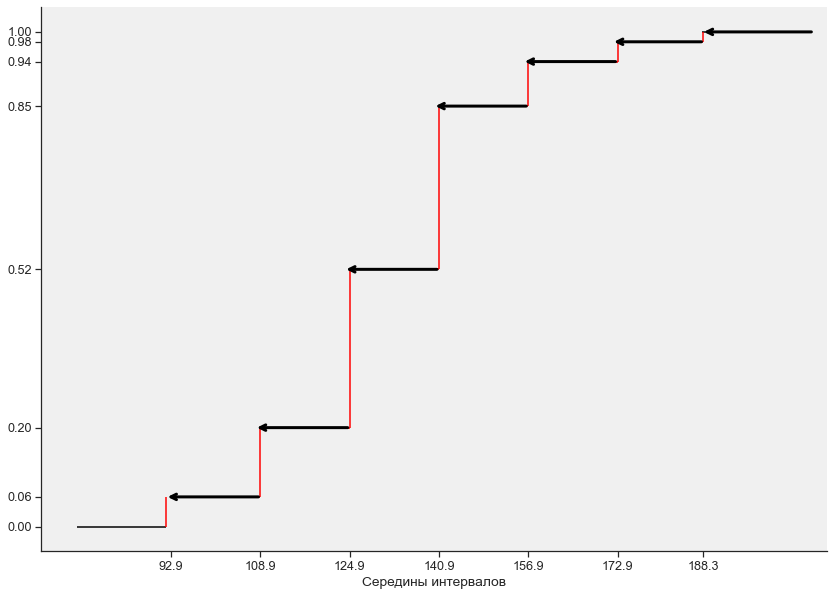

In [41]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='sum_rf', s=0,
                 kind='scatter', height=8.27, aspect=11.7/8.27, color='w')
for i in range(6):
    plt.hlines(f_inter['sum_rf'][i], f_inter['avg_inter'][i], f_inter['avg_inter'][i+1], color='r')
plt.hlines(1, 188, 188+h, color='k')
plt.hlines(0, 92-h, 92, color='k')
for i in range(6):
    plt.vlines(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i], f_inter['sum_rf'][i+1], color='r', linestyle='-')
plt.vlines(92, 0, 0.06, color='r', linestyle='-')
for i in range(6):
    plt.annotate('', xy=(f_inter['avg_inter'][i]-1, f_inter['sum_rf'][i]), 
                 xytext=(f_inter['avg_inter'][i+1], f_inter['sum_rf'][i]), 
                 arrowprops=dict(arrowstyle="->", color='k', linewidth=3))
plt.annotate('', xy=(188, 1), 
                 xytext=(208, 1), 
                 arrowprops=dict(arrowstyle="->", color='k', linewidth=3))
ax.set_axis_labels('Середины интервалов', '')
ax.set(xticks=f_inter['avg_inter'], yticks=[0]+f_inter['sum_rf'].to_list())
plt.savefig('pics2/5.png')

### Полигон

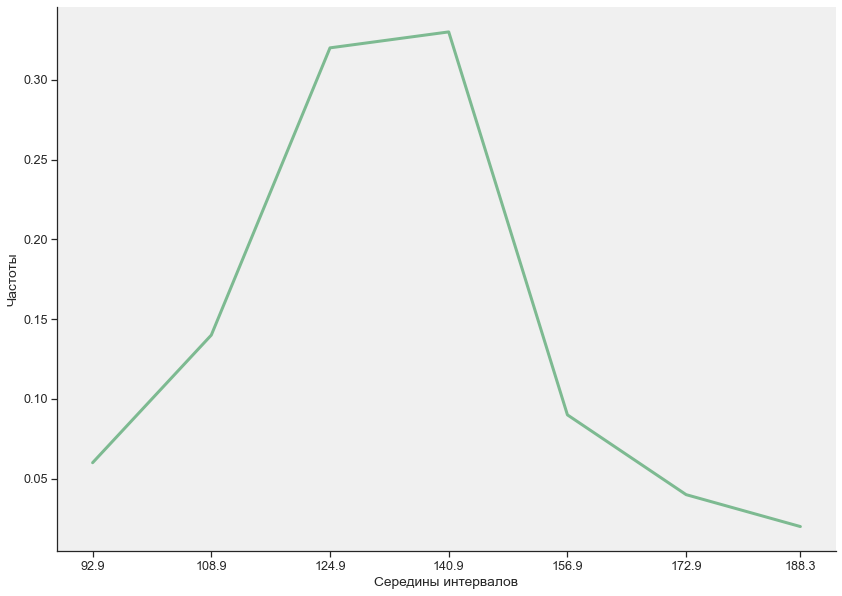

In [42]:
ax = sns.relplot(data=f_inter, x='avg_inter', y='rf', kind='line', 
                 height=8.27, aspect=11.7/8.27, linewidth=3)
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'])
plt.savefig('pics2/6.png')

### Гист

In [43]:
h*(0.0206+0.02+0.0088+0.0056+0.0038+0.0025+0.0012)

1.0

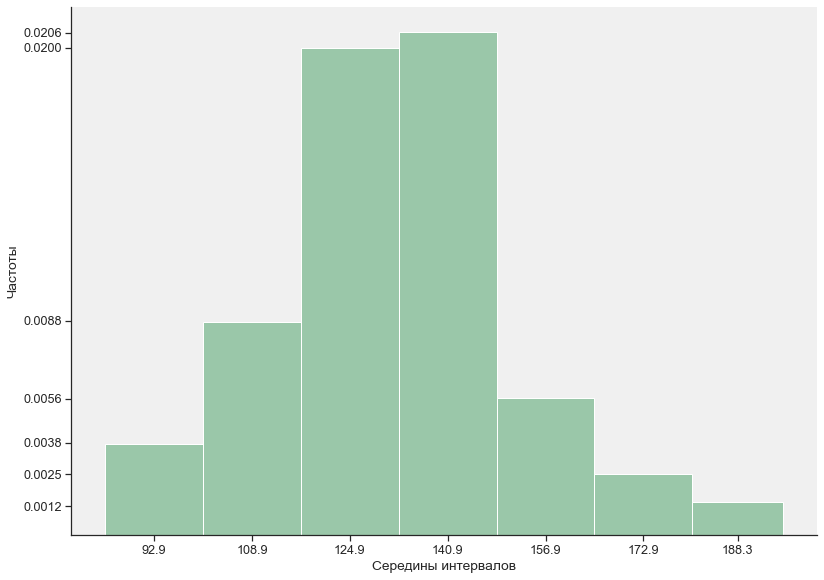

In [44]:
ax = sns.displot(data=df, x='E', bins=ivs, kind='hist', 
                 height=8.27, aspect=11.7/8.27, stat='density')
ax.set_axis_labels('Середины интервалов', 'Частоты')
ax.set(xticks=f_inter['avg_inter'], yticks=round((f_inter['rf']/h), 4))
plt.savefig('pics2/7.png')